# Лабораторная работа №0

## Приготовления к анализу данных

In [1]:
import numpy as np
import pandas as pd

In [2]:
# download titanic dataset
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 52.4MB/s]


In [3]:
!mv titanic.zip data
# unzip dataset
!unzip data/titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [38]:
df = pd.read_csv("data/train.csv", index_col="PassengerId")

### Посмотрим все на данные без преобразований

In [39]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [41]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [42]:
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Посмотрим на конкретные поля в данных и сделаем небольшие преобразования

In [43]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [44]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
A24            1
A16            1
C148           1
A6             1
C103           1
Name: Cabin, Length: 147, dtype: int64

In [45]:
df["Sex"].unique()

array(['male', 'female'], dtype=object)

In [46]:
df["Sex_b"] = df["Sex"] == "male"

In [47]:
df["Age"] = df["Age"].fillna(df["Age"].mean())

In [48]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Sex_b'],
      dtype='object')

In [49]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [50]:
# Выкинем бесполезные колонки
df.drop(["Name", "Ticket"], axis=1, inplace=True)

### Попробуем создать новый признак...

In [51]:
df["Cabin"].str[0].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [52]:
df["Cabin_char"] = df["Cabin"].str[0].fillna("U")

In [53]:
df.drop(["Cabin", "Sex"], axis=1, inplace=True)

In [54]:
df["Embarked"] = df["Embarked"].fillna('U')

In [59]:
df = df.drop(["Embarked"], axis=1).join(pd.get_dummies(df["Embarked"], prefix="embarked"))

In [61]:
df = df.drop(["Cabin_char"], axis=1).join(pd.get_dummies(df["Cabin_char"], prefix="cabin_char"))

## Нарисуем графики

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Матрица корреляциии признаков

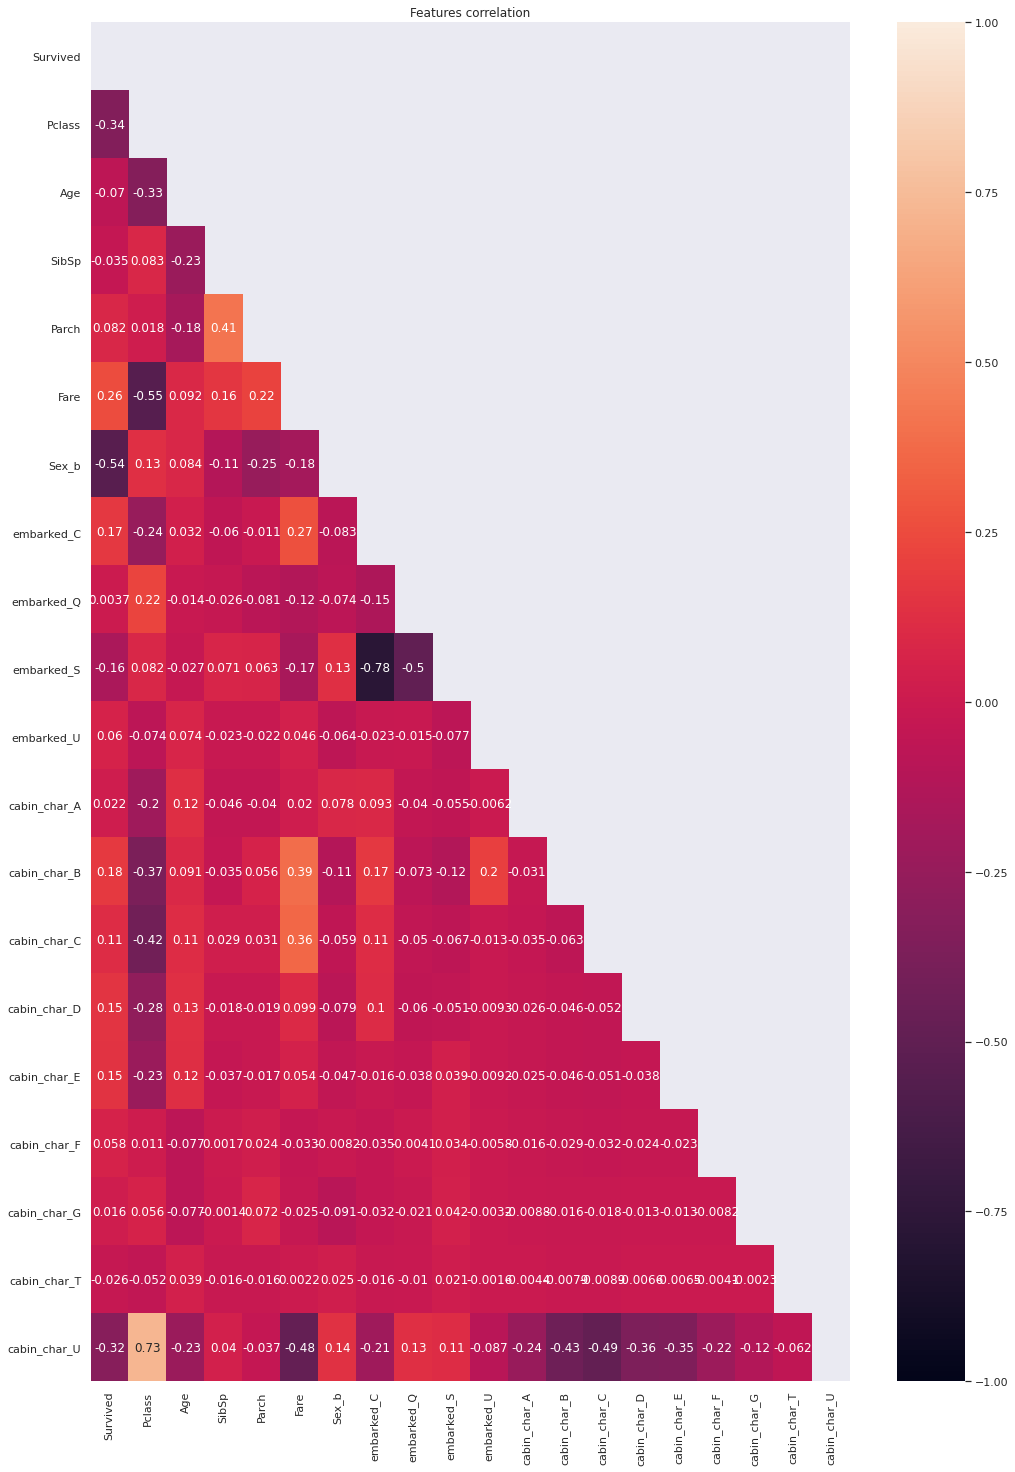

In [67]:
fig, ax = plt.subplots(figsize=(17, 25))
ax.set_title("Features correlation")
corr_df = df.corr()
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_df, vmin=-1, vmax=1, annot=True, mask=mask, ax=ax);

### Count-plot-ы

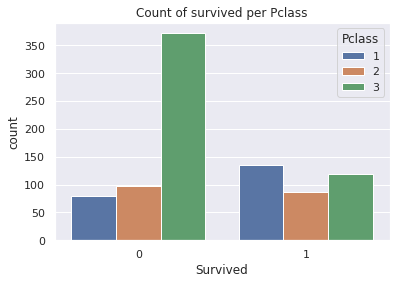

In [68]:
sns.countplot(x="Survived", hue="Pclass", data=df).set_title("Count of survived per Pclass");

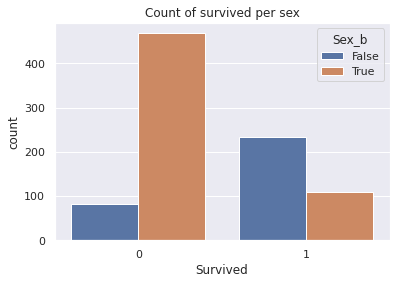

In [70]:
sns.countplot(x="Survived", hue="Sex_b", data=df).set_title("Count of survived per sex");

### И boxplot с усиками

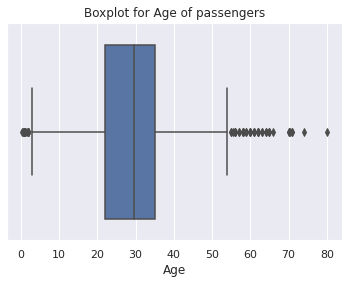

In [73]:
sns.boxplot(x=df["Age"]).set_title("Boxplot for Age of passengers");

### Гистограмму напоследок

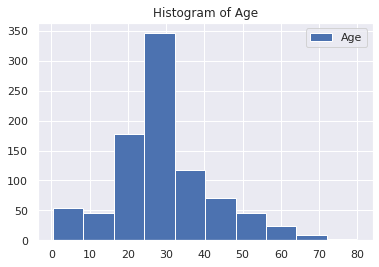

In [72]:
df["Age"].hist(legend=True).set_title("Histogram of Age");